In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('drive/MyDrive/MyDrive/Data/casos_covid_provincia.csv', sep=';', decimal=',')

In [4]:
df.head()

,fecha,provincia,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida
0,01/01/2020,Alicante,0,0,0,0,0,0
1,01/01/2020,Albacete,0,0,0,0,0,0
2,01/01/2020,Almeria,0,0,0,0,0,0
3,01/01/2020,Avila,0,0,0,0,0,0
4,01/01/2020,Barcelona,0,0,0,0,0,0


In [5]:
df.columns

Index(['fecha', 'provincia', 'num_casos', 'num_casos_prueba_pcr',
       'num_casos_prueba_test_ac', 'num_casos_prueba_ag',
       'num_casos_prueba_elisa', 'num_casos_prueba_desconocida'],
      dtype='object')

In [6]:
df.fecha=pd.to_datetime(df.fecha, format="%d/%m/%Y")

In [7]:
df.head()

,fecha,provincia,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida
0,2020-01-01,Alicante,0,0,0,0,0,0
1,2020-01-01,Albacete,0,0,0,0,0,0
2,2020-01-01,Almeria,0,0,0,0,0,0
3,2020-01-01,Avila,0,0,0,0,0,0
4,2020-01-01,Barcelona,0,0,0,0,0,0


In [8]:
sevilla_df = df[df["provincia"] == "Sevilla"]
sevilla_df.head()

,fecha,provincia,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida
40,2020-01-01,Sevilla,0,0,0,0,0,0
93,2020-01-02,Sevilla,0,0,0,0,0,0
146,2020-01-03,Sevilla,0,0,0,0,0,0
199,2020-01-04,Sevilla,0,0,0,0,0,0
252,2020-01-05,Sevilla,0,0,0,0,0,0


In [9]:
sevilla_df.columns

Index(['fecha', 'provincia', 'num_casos', 'num_casos_prueba_pcr',
       'num_casos_prueba_test_ac', 'num_casos_prueba_ag',
       'num_casos_prueba_elisa', 'num_casos_prueba_desconocida'],
      dtype='object')

In [10]:
sevilla_df2 = sevilla_df.set_index('fecha').resample('W')[['num_casos']].sum()

In [11]:
sevilla_df2.head()

,num_casos
fecha,
2020-01-05,0
2020-01-12,0
2020-01-19,0
2020-01-26,0
2020-02-02,1


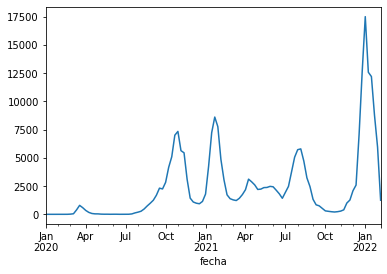

In [12]:
sevilla_df2['num_casos'].plot()

In [13]:
# create timeseries readable by fbprophet
ts = pd.DataFrame({'ds':sevilla_df2.index,'y':sevilla_df2.num_casos})
#ts['cap'] = 30000 # unused in linear growth
#ts['floor'] = 0 # unused in linear growth
ts.head()

,ds,y
fecha,,
2020-01-05,2020-01-05,0
2020-01-12,2020-01-12,0
2020-01-19,2020-01-19,0
2020-01-26,2020-01-26,0
2020-02-02,2020-02-02,1


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


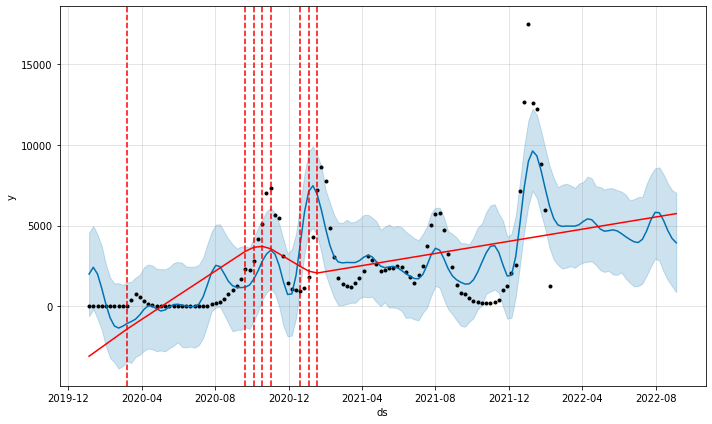

In [14]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
# instantiate the model and fit the timeseries
prophet = Prophet(changepoint_range=0.5,changepoint_prior_scale=0.5)
prophet.fit(ts)

# create a future data frame 
future = prophet.make_future_dataframe(periods=30, freq='W') #documentación para ver cómo poner semanas
forecast = prophet.predict(future)

# display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

# plot
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),prophet,forecast)
#fig

In [15]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-05,1995.991869,-624.863153,4559.575100
1,2020-01-12,2417.225926,-168.180556,4972.189501
2,2020-01-19,2000.981427,-753.349598,4436.086613
3,2020-01-26,1117.066579,-1448.152759,3730.680249
4,2020-02-02,118.707601,-2477.911089,2577.705724


In [16]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
135,2022-08-07,5564.595976,2829.263862,8603.331047,4276.283511,6828.138843,227.165508,227.165508,227.165508,227.165508,227.165508,227.165508,0.0,0.0,0.0,5791.761485
136,2022-08-14,5607.851214,2147.056725,8166.508077,4255.664818,6957.837636,-291.461201,-291.461201,-291.461201,-291.461201,-291.461201,-291.461201,0.0,0.0,0.0,5316.390013
137,2022-08-21,5651.106452,1625.141061,7608.526315,4203.521968,7076.603881,-960.017584,-960.017584,-960.017584,-960.017584,-960.017584,-960.017584,0.0,0.0,0.0,4691.088867
138,2022-08-28,5694.361689,1254.810158,7195.043809,4165.611949,7188.532376,-1488.218331,-1488.218331,-1488.218331,-1488.218331,-1488.218331,-1488.218331,0.0,0.0,0.0,4206.143359
139,2022-09-04,5737.616927,876.231378,7020.065646,4113.775684,7327.105926,-1805.409703,-1805.409703,-1805.409703,-1805.409703,-1805.409703,-1805.409703,0.0,0.0,0.0,3932.207224


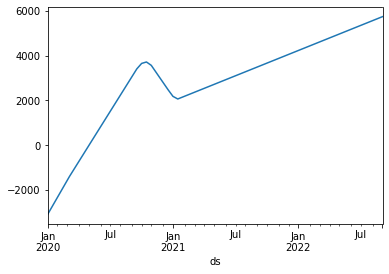

In [17]:
forecast.set_index('ds')['trend'].plot()

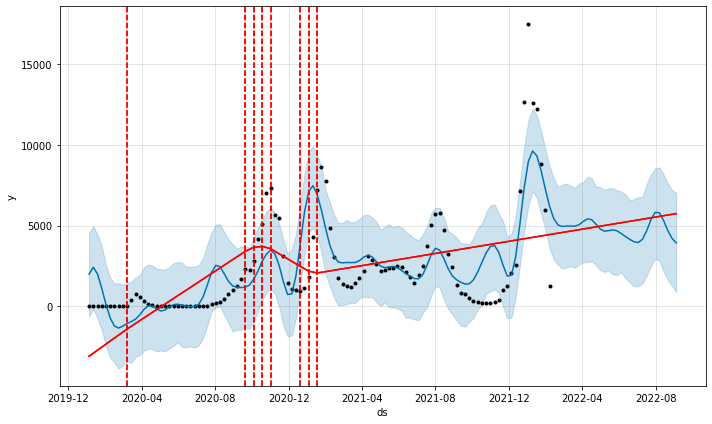

In [18]:
from fbprophet.plot import add_changepoints_to_plot
a = add_changepoints_to_plot(fig.gca(),prophet,forecast)
fig

In [19]:
# Guardamos el resultado en un fichero csv separado por comas. 
forecast.to_csv('covid_sevilla.csv',  index=False, sep=";", decimal=",")

In [20]:
# Guardamos el resultado en un fichero csv separado por comas. 
sevilla_df2.to_csv('covid_sevilla1.csv',  index=False, sep=",", decimal=",")